In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import math

## Ejercicio 7

#### Aplicar el test de Kolmogorov-Smirnov a uno de los generadores de números al azar con distribución normal univariada generado en el ejercicio 6. Utilizar un nivel de significación del 5%, y probar con distintos tamaños de muestras, analizar el resultado, e indicar si la distribución puede o no ser aceptada.

En este caso, se decidió utilizar el generador de la distribución normal con media 10 y desvío 2 obtenida en el ejercicio anterior.

In [2]:
# Funcion de densidad - Normal(μ, σ),
def normal(t, media, desvio):
    return math.exp(-((t - media) **2) / 2* ((desvio)** 2)) / math.sqrt(2 * math.pi * desvio)

# Funcion de densidad - Exponencial (λ)
def exponencial(t, lamda):
    return lamda * math.exp(-lamda * t)

# Probabilidad de aceptar o rechazar:  p = fX(t)/ c ∗ fY(t)
def probabilidad_aceptar(t):
    c = math.sqrt(2 * math.exp(1) / math.pi) 
    return normal(t, 0, 1) / (c * exponencial(t, 1))

def generar_normal(n, media, desvio):
    resultados = [] 
    i = 0
    while i < n:
        u1 = np.random.rand() #Genero un valor random con dist uniforme
        y1 = np.random.exponential() #Genero un valor random con dist exponencial

        if (u1 <= probabilidad_aceptar(y1)): #Acepto muestra
            lado = np.random.rand()

            if (lado < 0.5): # lado izquierdo
                resultados.append(-y1*desvio+media)

            else:          # lado derecho
                resultados.append(y1*desvio+media)
            i+=1
            
    return np.array(resultados)

A continuación, se describe el test a utilizar de la siguiente manera:

$H_0: F_X(x) \equiv \hat{F}_X(x) \;\;\;\;\; vs \;\;\;\;\; H_1: F_X(x)\neq \hat{F}_X(x)\;\;\;\;\;$, donde $X \sim N(10, 2)$

A fines de realizar dicho test, se define el estadístico $D$ de forma tal que
$D = \sqrt{n}·max_x |\hat{F}_X(x) - F_X(x)|$

Con esto, se puede llegar a que se acepta $H_0$ si se cumple que:

$D \;\; \leq z_\alpha\;\;\;\;,$ con $z_\alpha$ = cuantil delimitador de la zona de rechazo

Y se la rechaza en caso contrario.

Una vez, explicado esto se procede a verificar si la distribución generada en el ejercicio anterior puede ser aceptada o no.

Se define el nivel de significación ($\alpha$) a utilizar.

In [3]:
alfa = 0.05

Se obtiene $z_\alpha$

In [4]:
z = norm(10,2).ppf(1-alfa)
z

13.289707253902945

Se generan las distintas muestras a emplear a lo largo de este ejericio.

In [5]:
muestra_10 = np.sort(generar_normal(10, 10, 2))
muestra_50 = np.sort(generar_normal(50, 10, 2))
muestra_100 = np.sort(generar_normal(100, 10, 2))
muestra_200 = np.sort(generar_normal(200, 10, 2))
muestra_500 =np.sort(generar_normal(500, 10, 2))
muestra_1000 =np.sort(generar_normal(1000, 10, 2))

Luego, se define la función de distribución empírica:

In [6]:
def F_emp(muestra):
    F_muestra = []
    n = muestra.size
    for x in muestra:
        F_muestra.append((muestra <= x).sum()/muestra.size)
    return np.array(F_muestra)

Se definen la función que evaluará el test:

In [7]:
def test_ks(muestra, esperados, z):
    D = np.max(math.sqrt(muestra.size)*np.abs(muestra-esperados))
    if D > z:
        print("Se rechaza la hipótsis nula.")
    else:
        print("Se acepta la hipótesis nula puesto que no hay evidencia suficiente para "
              "rechazarla.")

Finalmente, se procede a evaluar y graficar cada una de las muestras.

In [8]:
def graficar_muestras(muestra_x, muestra_y):
    normal_x = np.linspace(0,20,1000)
    normal_y = norm.cdf(normal_x, 10, 2)
    
    plt.figure(figsize=(13,8))
    plt.plot(normal_x, normal_y, label="Distribución normal")
    plt.step(muestra_x, muestra_y, where='post', label="Distribución normal empírica")
    plt.plot(muestra_x, muestra_y, alpha=0.0)

    plt.locator_params(axis="x", nbins=12)    
    plt.xlabel('x', labelpad=20, size=16)
    plt.ylabel('F(x)', labelpad=20, size=20)
    plt.xlim([0,20])
    plt.legend(prop={'size': 10})
    plt.grid(b=True, axis='y', linestyle='--')
    
    plt.show()

### 10 muestras

In [9]:
normal_muestra = norm.cdf(muestra_10, 10, 2)
normal_emp_muestra = F_emp(muestra_10)

In [10]:
test_ks(normal_emp_muestra, normal_muestra, z)

Se acepta la hipótesis nula puesto que no hay evidencia suficiente para rechazarla.


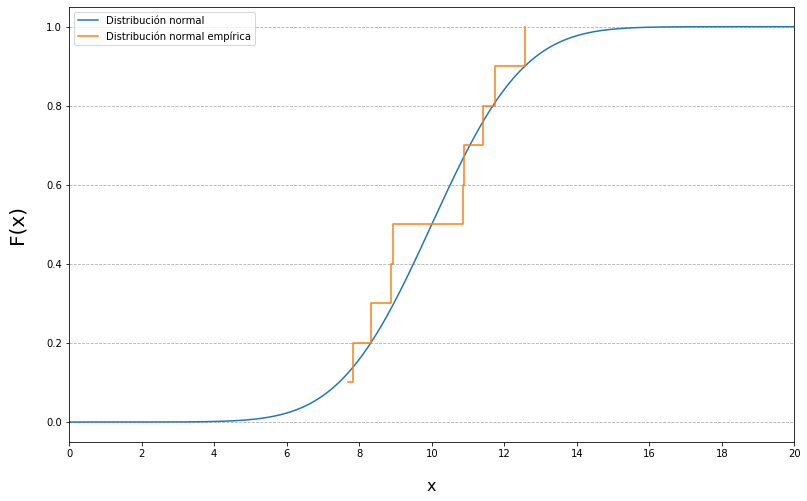

In [11]:
graficar_muestras(muestra_10, normal_emp_muestra)

### 50 muestras

In [12]:
normal_muestra = norm.cdf(muestra_50, 10, 2)
normal_emp_muestra = F_emp(muestra_50)

In [13]:
test_ks(normal_emp_muestra, normal_muestra, z)

Se acepta la hipótesis nula puesto que no hay evidencia suficiente para rechazarla.


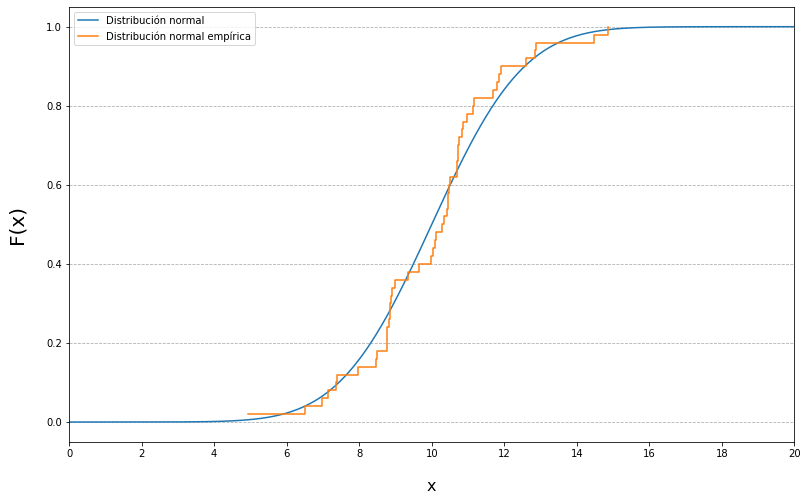

In [14]:
graficar_muestras(muestra_50, normal_emp_muestra)

### 100 muestras

In [15]:
normal_muestra = norm.cdf(muestra_100, 10, 2)
normal_emp_muestra = F_emp(muestra_100)

In [16]:
test_ks(normal_emp_muestra, normal_muestra, z)

Se acepta la hipótesis nula puesto que no hay evidencia suficiente para rechazarla.


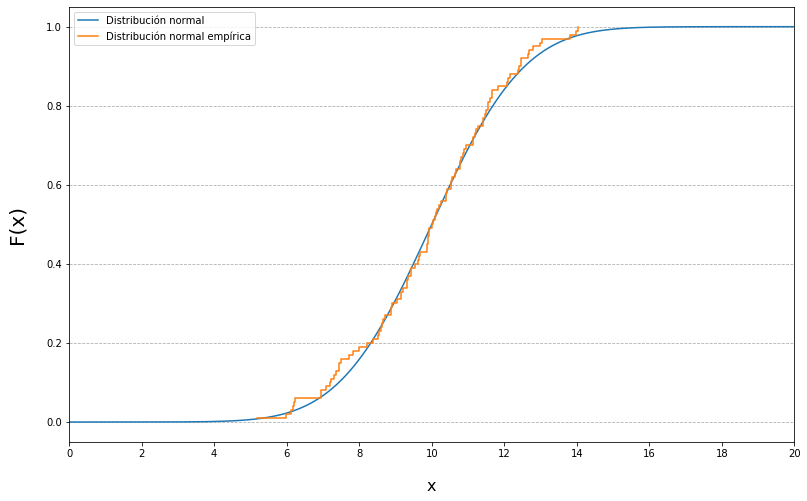

In [17]:
graficar_muestras(muestra_100, normal_emp_muestra)

### 200 muestras

In [18]:
normal_muestra = norm.cdf(muestra_200, 10, 2)
normal_emp_muestra = F_emp(muestra_200)

In [19]:
test_ks(normal_emp_muestra, normal_muestra, z)

Se acepta la hipótesis nula puesto que no hay evidencia suficiente para rechazarla.


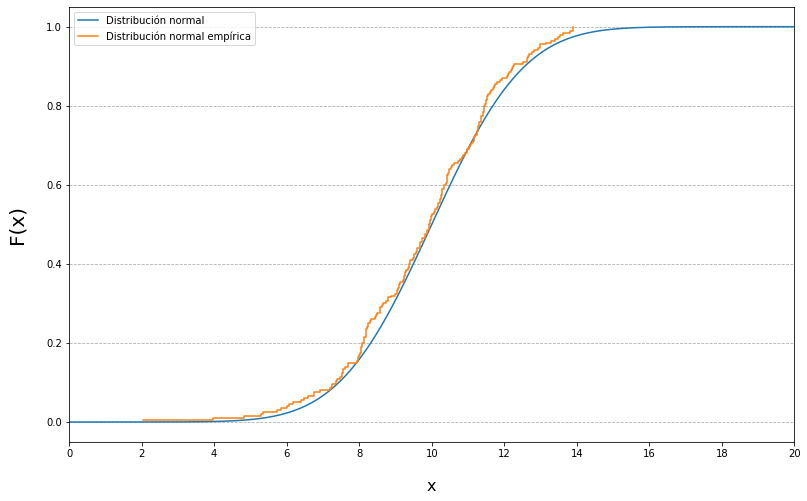

In [20]:
graficar_muestras(muestra_200, normal_emp_muestra)

### 500 muestras

In [21]:
normal_muestra = norm.cdf(muestra_500, 10, 2)
normal_emp_muestra = F_emp(muestra_500)

In [22]:
test_ks(normal_emp_muestra, normal_muestra, z)

Se acepta la hipótesis nula puesto que no hay evidencia suficiente para rechazarla.


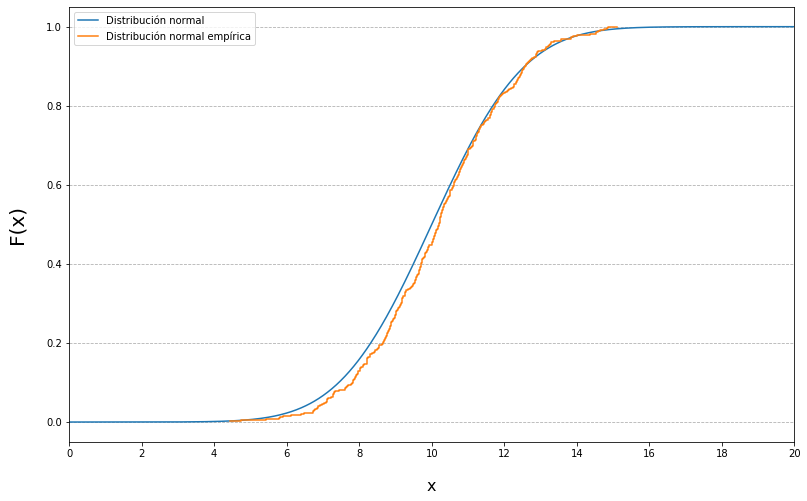

In [23]:
graficar_muestras(muestra_500, normal_emp_muestra)

### 1000 muestras

In [24]:
normal_muestra = norm.cdf(muestra_1000, 10, 2)
normal_emp_muestra = F_emp(muestra_1000)

In [25]:
test_ks(normal_emp_muestra, normal_muestra, z)

Se acepta la hipótesis nula puesto que no hay evidencia suficiente para rechazarla.


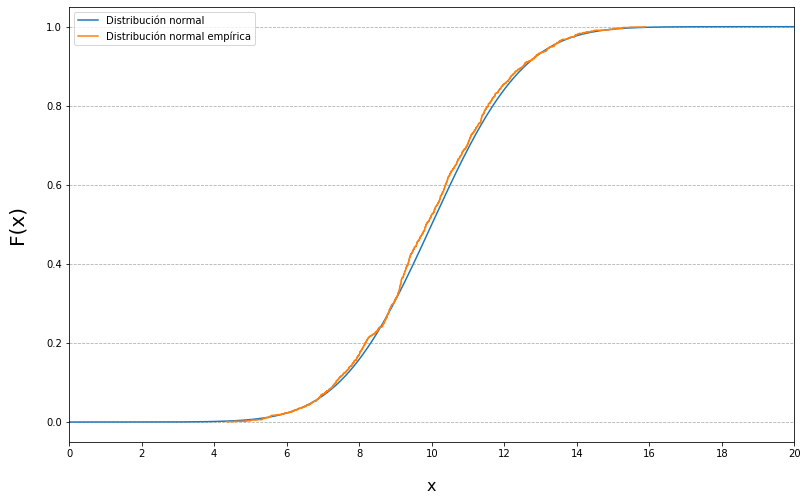

In [26]:
graficar_muestras(muestra_1000, normal_emp_muestra)

### Conclusiones

Como se pudo observar a medida que se aumenta el número de muestras, la función de distribución empírica empleada por este test se asemeja en mayor medida a la distribución original. Esto produce que el valor del estadístico sea cada vez menor, lo cual afirma cada vez más que no hay evidencias suficientes para rechazar la hipótesis nula.

En otras palabras, el test no confirma que ambas distribuciones son similares sino que establace que no hay evidencias para decir que son distintas. Empero se puede mencionar que, tras las visualizaciones, es viable aceptar al generador utilizado empleando numerosas muestras.

Sin embargo, este modelo cuenta con un inconveniente el cual consiste en que necesita una cierta cantidad de muestras para poder funcionar correctamente. Esto se debe a la fórmula del cálculo del estadístico, lo cual se ejemplifica a continuación.

En este caso particular, para rechazar la hipótises nula se busca

$D > z_\alpha\;$

Reemplazando se obtiene

$\sqrt{n}·max_x |\hat{F}_X(x) - F_X(x)|>13.29$

Como se trata de funciones de distribución, el valor máximo del módulo de la diferencia puede ser 1, quedando

$\sqrt{n} > 13.29$

Como la cantidad de muestras es un número natural, despejando se obtiene

$n > 176.62$

Esto significa que a partir de las 177 muestras, este test va a poder rechazar la hipótesis nula.